In [1]:
import os
import shutil
import random
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models, regularizers, backend as K

In [3]:
# ---------------------------
# PATH & PARAMETER
# ---------------------------
raw_data_dir = "E:\DATASET"
preprocessed_dir = "E:\Preprocessed"
split_data_dir = "E:\Split"
target_size = (224, 224)
batch_size = 32
num_classes = 4
epochs = 100

# 1. PREPROCESS (convert ke RGB, resize, normalisasi, save)

In [4]:
def preprocess_and_save(source_dir, dest_dir, target_size=(224, 224)):
    if not os.path.exists(dest_dir) or not os.listdir(dest_dir):
        for class_name in os.listdir(source_dir):
            src_path = os.path.join(source_dir, class_name)
            dst_path = os.path.join(dest_dir, class_name)
            os.makedirs(dst_path, exist_ok=True)

            for img_name in os.listdir(src_path):
                img_path = os.path.join(src_path, img_name)
                try:
                    # semua gambar jadi RGB
                    img = Image.open(img_path).convert("RGB")  
                    img = img.resize(target_size)

                    # Normalisasi piksel ke [0,1]
                    img_array = np.asarray(img).astype(np.float32) / 255.0

                    # Simpan kembali hasil normalisasi (RGB)
                    save_img = Image.fromarray((img_array * 255).astype(np.uint8))
                    save_path = os.path.join(dst_path, img_name)
                    save_img.save(save_path)
                except Exception as e:
                    print(f"Gagal memproses {img_path}: {e}")

        print(f"Preprocessing selesai dan disimpan : {dest_dir}")
    else:
        print(f"Preprocessed data sudah ada di: {dest_dir}")


In [9]:
def tampilkan_dimensi_semua_gambar(directory):
    print("Gambar : Semua Gambar\n")
    semua_ukuran = set()

    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        semua_ukuran.add((width, height))
                        print(f"Dimensions: {width} x {height}")
                        print(f"Width: {width} pixels")
                        print(f"Height: {height} pixels")
                        print("-" * 30)
                except Exception as e:
                    print(f"⚠️ Gagal membuka gambar {img_name}: {e}")

    if len(semua_ukuran) == 1:
        ukuran = semua_ukuran.pop()
        print(f"✅ Semua gambar berukuran sama yaitu {ukuran[0]}x{ukuran[1]}.")
    else:
        print(f"⚠️ Ditemukan gambar dengan ukuran berbeda: {semua_ukuran}")

tampilkan_dimensi_semua_gambar(preprocessed_dir)

Gambar : Semua Gambar

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions: 224 x 224
Width: 224 pixels
Height: 224 pixels
------------------------------
Dimensions

In [6]:
# ---------------------------
# 2. SPLIT DATA (train/val/test)
# ---------------------------
def split_data(source_dir, dest_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    if not os.path.exists(os.path.join(dest_dir, 'train')) or not os.listdir(os.path.join(dest_dir, 'train')):
        for class_name in os.listdir(source_dir):
            src_class = os.path.join(source_dir, class_name)
            images = os.listdir(src_class)
            random.shuffle(images)
            total = len(images)
            train_end = int(train_ratio * total)
            val_end = train_end + int(val_ratio * total)

            for i, img_name in enumerate(images):
                subset = "train" if i < train_end else "val" if i < val_end else "test"
                dst_path = os.path.join(dest_dir, subset, class_name)
                os.makedirs(dst_path, exist_ok=True)
                shutil.copy(os.path.join(src_class, img_name), os.path.join(dst_path, img_name))

        print(f"Data telah di-split dan disimpan di: {dest_dir}")
    else:
        print(f"Data sudah ada di folder {dest_dir}, split tidak dilakukan.")

split_data(preprocessed_dir, split_data_dir)


Preprocessed data sudah ada di: E:\Preprocessed
Data sudah ada di folder E:\Split, split tidak dilakukan.


In [17]:
import os
from PIL import Image

def check_image_color_modes(image_dirs):
    mode_count = {'RGB': 0, 'Grayscale': 0, 'Other': 0}
    error_files = []

    # Iterate through all directories in the list
    for image_dir in image_dirs:
        print(f"Memeriksa folder: {image_dir}")
        
        # Iterate through all images in the directory
        for root, dirs, files in os.walk(image_dir):
            for file in files:
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(root, file)

                    try:
                        # Buka gambar dengan PIL
                        with Image.open(img_path) as pil_img:
                            mode = pil_img.mode

                            if mode == 'RGB':
                                mode_count['RGB'] += 1
                            elif mode == 'L':  # Mode 'L' adalah Grayscale di PIL
                                mode_count['Grayscale'] += 1
                            else:
                                mode_count['Other'] += 1
                    except Exception as e:
                        error_files.append(f"Error loading {file}: {e}")

    # Print the results
    print("\n=== HASIL DETEKSI TIPE GAMBAR ===")
    for mode, count in mode_count.items():
        print(f"{mode}: {count} gambar")

    if error_files:
        print(f"\n❌ Gagal memproses beberapa file:")
        for error in error_files:
            print(f"- {error}")

# Ganti dengan tiga path dataset kamu
image_dirs = [
    "E:\DATASET",  # Contoh direktori, sesuaikan dengan data kamu
    "E:\Preprocessed",
    "E:\Split"
]

# Panggil fungsi untuk memeriksa mode gambar
check_image_color_modes(image_dirs)


Memeriksa folder: E:\DATASET
Memeriksa folder: E:\Preprocessed
Memeriksa folder: E:\Split

=== HASIL DETEKSI TIPE GAMBAR ===
RGB: 24861 gambar
Grayscale: 0 gambar
Other: 0 gambar


In [18]:
def check_normalized_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('jpg', 'jpeg', 'png')):
                img_path = os.path.join(root, file)
                img = Image.open(img_path).convert('RGB')
                img = img.resize((224, 224))  # Sesuai ukuran target
                img_array = np.array(img).astype(np.float32) / 255.0  # Normalisasi sementara

                if not ((img_array >= 0.0).all() and (img_array <= 1.0).all()):
                    print(f"[!] Gambar TIDAK ter-normalisasi: {img_path}")
                    return False
    print("✅ Semua gambar sudah dalam rentang normalisasi (0.0–1.0)")
    return True

# Ganti dengan direktori val dan test kamu
val_ok = check_normalized_images(os.path.join(split_data_dir, 'val'))
test_ok = check_normalized_images(os.path.join(split_data_dir, 'test'))


✅ Semua gambar sudah dalam rentang normalisasi (0.0–1.0)
✅ Semua gambar sudah dalam rentang normalisasi (0.0–1.0)


In [7]:
# ---------------------------
# 3. DATA GENERATOR (tanpa rescale)
# ---------------------------

train_gen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.2,
    brightness_range=[0.6, 1.4],
    channel_shift_range=30.0,
    fill_mode='nearest'
)

val_test_gen = ImageDataGenerator() 

train_generator = train_gen.flow_from_directory(
    os.path.join(split_data_dir, "train"),
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator = val_test_gen.flow_from_directory(
    os.path.join(split_data_dir, "val"),
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator = val_test_gen.flow_from_directory(
    os.path.join(split_data_dir, "test"),
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 5800 images belonging to 4 classes.
Found 1241 images belonging to 4 classes.
Found 1246 images belonging to 4 classes.


In [9]:
# ---------------------------
# BASIC RESIDUAL BLOCK (ResNet18 & 34)
# ---------------------------
def basic_block(x, filters, stride=1, downsample=False):
    shortcut = x

    x = layers.Conv2D(filters, 3, strides=stride, padding='same',
                      kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, 3, strides=1, padding='same',
                      kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)

    if downsample or shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=stride, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return x

# ---------------------------
# BUILD RESNET34 MODEL
# ---------------------------
def build_resnet34(input_shape=(224, 224, 3), num_classes=4):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    # Conv2_x: 3 blocks
    for i in range(3):
        x = basic_block(x, 64, stride=1, downsample=(i == 0))

    # Conv3_x: 4 blocks
    for i in range(4):
        x = basic_block(x, 128, stride=2 if i == 0 else 1, downsample=(i == 0))

    # Conv4_x: 6 blocks
    for i in range(6):
        x = basic_block(x, 256, stride=2 if i == 0 else 1, downsample=(i == 0))

    # Conv5_x: 3 blocks
    for i in range(3):
        x = basic_block(x, 512, stride=2 if i == 0 else 1, downsample=(i == 0))

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

# ---------------------------
# FOCAL LOSS FUNCTION
# ---------------------------
def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_pred = K.clip(y_pred, K.epsilon(), 1. - K.epsilon())
        cross_entropy = -y_true * K.log(y_pred)
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy
        return K.sum(loss, axis=1)
    return focal_loss_fixed

# ---------------------------
# COMPILE MODEL
# ---------------------------
model = build_resnet34(input_shape=(224, 224, 3), num_classes=4)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=focal_loss(),
              metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │      9,472 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 112, 112,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 56, 56,    │          0 │ re_lu[0][0]       │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 56,    │     36,928 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │     36,928 │ re_lu_1[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 56, 56,    │      4,160 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 56, 56,    │          0 │ add[0][0]         │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 56,    │     36,928 │ re_lu_2[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat

 Total params: 21,579,332 (82.32 MB)

 Trainable params: 21,562,180 (82.25 MB)

 Non-trainable params: 17,152 (67.00 KB)

In [21]:
# ---------------------------
# 5. CALLBACKS
# ---------------------------
checkpoint = ModelCheckpoint('Model Terbaik_Tahap 1.h5', monitor='val_accuracy', save_best_only=True)
checkpoint_keras = ModelCheckpoint('Model Terbaik_Tahap 1 keras.keras', monitor='val_accuracy', save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)


In [22]:
# ---------------------------
# 6. TRAINING
# ---------------------------
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[checkpoint, reduce_lr]
)

Epoch 1/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3083 - loss: 1.0195

182/182 ━━━━━━━━━━━━━━━━━━━━ 502s 3s/step - accuracy: 0.3084 - loss: 1.0192 - val_accuracy: 0.3570 - val_loss: 0.8998 - learning_rate: 1.0000e-04
Epoch 2/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4089 - loss: 0.8898

182/182 ━━━━━━━━━━━━━━━━━━━━ 492s 3s/step - accuracy: 0.4090 - loss: 0.8898 - val_accuracy: 0.4400 - val_loss: 0.8778 - learning_rate: 1.0000e-04
Epoch 3/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4440 - loss: 0.8675

182/182 ━━━━━━━━━━━━━━━━━━━━ 503s 3s/step - accuracy: 0.4441 - loss: 0.8675 - val_accuracy: 0.4690 - val_loss: 0.8490 - learning_rate: 1.0000e-04
Epoch 4/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4921 - loss: 0.8399

182/182 ━━━━━━━━━━━━━━━━━━━━ 521s 3s/step - accuracy: 0.4922 - loss: 0.8398 - val_accuracy: 0.5036 - val_loss: 0.8579 - learning_rate: 1.0000e-04
Epoch 5/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5553 - loss: 0.8051

182/182 ━━━━━━━━━━━━━━━━━━━━ 488s 3s/step - accuracy: 0.5554 - loss: 0.8051 - val_accuracy: 0.5544 - val_loss: 0.8163 - learning_rate: 1.0000e-04
Epoch 6/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6287 - loss: 0.7683

182/182 ━━━━━━━━━━━━━━━━━━━━ 485s 3s/step - accuracy: 0.6287 - loss: 0.7683 - val_accuracy: 0.5818 - val_loss: 0.7639 - learning_rate: 1.0000e-04
Epoch 7/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 487s 3s/step - accuracy: 0.6610 - loss: 0.7373 - val_accuracy: 0.5600 - val_loss: 0.7744 - learning_rate: 1.0000e-04
Epoch 8/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6746 - loss: 0.7060

182/182 ━━━━━━━━━━━━━━━━━━━━ 480s 3s/step - accuracy: 0.6747 - loss: 0.7060 - val_accuracy: 0.6745 - val_loss: 0.6922 - learning_rate: 1.0000e-04
Epoch 9/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 488s 3s/step - accuracy: 0.7134 - loss: 0.6770 - val_accuracy: 0.5359 - val_loss: 0.7610 - learning_rate: 1.0000e-04
Epoch 10/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7016 - loss: 0.6516

182/182 ━━━━━━━━━━━━━━━━━━━━ 496s 3s/step - accuracy: 0.7017 - loss: 0.6515 - val_accuracy: 0.7236 - val_loss: 0.6317 - learning_rate: 1.0000e-04
Epoch 11/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 527s 3s/step - accuracy: 0.7293 - loss: 0.6204 - val_accuracy: 0.7002 - val_loss: 0.6352 - learning_rate: 1.0000e-04
Epoch 12/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 563s 3s/step - accuracy: 0.7413 - loss: 0.5995 - val_accuracy: 0.7019 - val_loss: 0.5852 - learning_rate: 1.0000e-04
Epoch 13/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 560s 3s/step - accuracy: 0.7482 - loss: 0.5706 - val_accuracy: 0.7196 - val_loss: 0.5624 - learning_rate: 1.0000e-04
Epoch 14/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 567s 3s/step - accuracy: 0.7459 - loss: 0.5476 - val_accuracy: 0.7180 - val_loss: 0.5433 - learning_rate: 1.0000e-04
Epoch 15/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 562s 3s/step - accuracy: 0.7723 - loss: 0.5193 - val_accuracy: 0.6366 - val_loss: 0.5349 - learning_rate: 1.0000e-04
Epoch 16/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 532s 3s/step - ac

182/182 ━━━━━━━━━━━━━━━━━━━━ 494s 3s/step - accuracy: 0.7734 - loss: 0.4510 - val_accuracy: 0.7365 - val_loss: 0.4493 - learning_rate: 1.0000e-04
Epoch 19/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7825 - loss: 0.4279

182/182 ━━━━━━━━━━━━━━━━━━━━ 500s 3s/step - accuracy: 0.7825 - loss: 0.4279 - val_accuracy: 0.7905 - val_loss: 0.4043 - learning_rate: 1.0000e-04
Epoch 20/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 551s 3s/step - accuracy: 0.7832 - loss: 0.4063 - val_accuracy: 0.7550 - val_loss: 0.4046 - learning_rate: 1.0000e-04
Epoch 21/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 579s 3s/step - accuracy: 0.7979 - loss: 0.3870 - val_accuracy: 0.7566 - val_loss: 0.3898 - learning_rate: 1.0000e-04
Epoch 22/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7956 - loss: 0.3703

182/182 ━━━━━━━━━━━━━━━━━━━━ 567s 3s/step - accuracy: 0.7956 - loss: 0.3702 - val_accuracy: 0.7945 - val_loss: 0.3731 - learning_rate: 1.0000e-04
Epoch 23/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 567s 3s/step - accuracy: 0.7988 - loss: 0.3546 - val_accuracy: 0.7252 - val_loss: 0.3668 - learning_rate: 1.0000e-04
Epoch 24/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7940 - loss: 0.3373

182/182 ━━━━━━━━━━━━━━━━━━━━ 581s 3s/step - accuracy: 0.7940 - loss: 0.3373 - val_accuracy: 0.7977 - val_loss: 0.3295 - learning_rate: 1.0000e-04
Epoch 25/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8087 - loss: 0.3217

182/182 ━━━━━━━━━━━━━━━━━━━━ 574s 3s/step - accuracy: 0.8087 - loss: 0.3217 - val_accuracy: 0.8372 - val_loss: 0.3016 - learning_rate: 1.0000e-04
Epoch 26/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 578s 3s/step - accuracy: 0.8127 - loss: 0.3078 - val_accuracy: 0.7816 - val_loss: 0.3158 - learning_rate: 1.0000e-04
Epoch 27/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 578s 3s/step - accuracy: 0.8177 - loss: 0.2941 - val_accuracy: 0.6785 - val_loss: 0.3049 - learning_rate: 1.0000e-04
Epoch 28/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 548s 3s/step - accuracy: 0.8134 - loss: 0.2829 - val_accuracy: 0.6833 - val_loss: 0.3378 - learning_rate: 1.0000e-04
Epoch 29/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 496s 3s/step - accuracy: 0.8146 - loss: 0.2736 - val_accuracy: 0.7309 - val_loss: 0.2923 - learning_rate: 1.0000e-04
Epoch 30/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 488s 3s/step - accuracy: 0.8107 - loss: 0.2595 - val_accuracy: 0.7921 - val_loss: 0.2675 - learning_rate: 1.0000e-04
Epoch 31/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 492s 3s/step - ac

182/182 ━━━━━━━━━━━━━━━━━━━━ 561s 3s/step - accuracy: 0.8249 - loss: 0.2154 - val_accuracy: 0.8388 - val_loss: 0.2065 - learning_rate: 1.0000e-04
Epoch 37/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 566s 3s/step - accuracy: 0.8409 - loss: 0.2072 - val_accuracy: 0.6954 - val_loss: 0.2544 - learning_rate: 1.0000e-04
Epoch 38/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 563s 3s/step - accuracy: 0.8332 - loss: 0.2024 - val_accuracy: 0.7679 - val_loss: 0.2161 - learning_rate: 1.0000e-04
Epoch 39/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 564s 3s/step - accuracy: 0.8415 - loss: 0.1939 - val_accuracy: 0.8243 - val_loss: 0.2069 - learning_rate: 1.0000e-04
Epoch 40/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 562s 3s/step - accuracy: 0.8322 - loss: 0.1973 - val_accuracy: 0.7510 - val_loss: 0.2225 - learning_rate: 1.0000e-04
Epoch 41/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 563s 3s/step - accuracy: 0.8475 - loss: 0.1842 - val_accuracy: 0.8155 - val_loss: 0.1926 - learning_rate: 1.0000e-04
Epoch 42/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 562s 3s/step - ac

182/182 ━━━━━━━━━━━━━━━━━━━━ 488s 3s/step - accuracy: 0.8506 - loss: 0.1529 - val_accuracy: 0.8646 - val_loss: 0.1504 - learning_rate: 1.0000e-04
Epoch 52/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 490s 3s/step - accuracy: 0.8458 - loss: 0.1520 - val_accuracy: 0.8501 - val_loss: 0.1538 - learning_rate: 1.0000e-04
Epoch 53/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 561s 3s/step - accuracy: 0.8597 - loss: 0.1480 - val_accuracy: 0.7985 - val_loss: 0.1613 - learning_rate: 1.0000e-04
Epoch 54/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 560s 3s/step - accuracy: 0.8635 - loss: 0.1446 - val_accuracy: 0.6044 - val_loss: 0.3121 - learning_rate: 1.0000e-04
Epoch 55/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 559s 3s/step - accuracy: 0.8524 - loss: 0.1466 - val_accuracy: 0.8203 - val_loss: 0.1570 - learning_rate: 1.0000e-04
Epoch 56/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 493s 3s/step - accuracy: 0.8632 - loss: 0.1400 - val_accuracy: 0.8380 - val_loss: 0.1479 - learning_rate: 1.0000e-04
Epoch 57/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 503s 3s/step - ac

182/182 ━━━━━━━━━━━━━━━━━━━━ 583s 3s/step - accuracy: 0.8785 - loss: 0.1146 - val_accuracy: 0.8864 - val_loss: 0.1250 - learning_rate: 5.0000e-05
Epoch 69/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 579s 3s/step - accuracy: 0.9005 - loss: 0.1069 - val_accuracy: 0.8759 - val_loss: 0.1195 - learning_rate: 5.0000e-05
Epoch 70/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 563s 3s/step - accuracy: 0.9046 - loss: 0.1044 - val_accuracy: 0.8840 - val_loss: 0.1222 - learning_rate: 5.0000e-05
Epoch 71/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 571s 3s/step - accuracy: 0.9100 - loss: 0.1028 - val_accuracy: 0.8743 - val_loss: 0.1220 - learning_rate: 5.0000e-05
Epoch 72/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 565s 3s/step - accuracy: 0.9167 - loss: 0.0999 - val_accuracy: 0.8590 - val_loss: 0.1229 - learning_rate: 5.0000e-05
Epoch 73/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8994 - loss: 0.1005

182/182 ━━━━━━━━━━━━━━━━━━━━ 574s 3s/step - accuracy: 0.8994 - loss: 0.1005 - val_accuracy: 0.8912 - val_loss: 0.1185 - learning_rate: 5.0000e-05
Epoch 74/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 580s 3s/step - accuracy: 0.9146 - loss: 0.0980 - val_accuracy: 0.8703 - val_loss: 0.1259 - learning_rate: 5.0000e-05
Epoch 75/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 571s 3s/step - accuracy: 0.9058 - loss: 0.0975 - val_accuracy: 0.8606 - val_loss: 0.1302 - learning_rate: 5.0000e-05
Epoch 76/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 570s 3s/step - accuracy: 0.9202 - loss: 0.0972 - val_accuracy: 0.8743 - val_loss: 0.1191 - learning_rate: 5.0000e-05
Epoch 77/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 568s 3s/step - accuracy: 0.9147 - loss: 0.0961 - val_accuracy: 0.8566 - val_loss: 0.1305 - learning_rate: 5.0000e-05
Epoch 78/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 574s 3s/step - accuracy: 0.9137 - loss: 0.0956 - val_accuracy: 0.8662 - val_loss: 0.1245 - learning_rate: 5.0000e-05
Epoch 79/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accu

182/182 ━━━━━━━━━━━━━━━━━━━━ 585s 3s/step - accuracy: 0.9295 - loss: 0.0917 - val_accuracy: 0.9001 - val_loss: 0.1086 - learning_rate: 2.5000e-05
Epoch 80/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 572s 3s/step - accuracy: 0.9375 - loss: 0.0864 - val_accuracy: 0.8807 - val_loss: 0.1143 - learning_rate: 2.5000e-05
Epoch 81/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 564s 3s/step - accuracy: 0.9360 - loss: 0.0862 - val_accuracy: 0.8888 - val_loss: 0.1143 - learning_rate: 2.5000e-05
Epoch 82/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 577s 3s/step - accuracy: 0.9390 - loss: 0.0861 - val_accuracy: 0.8888 - val_loss: 0.1143 - learning_rate: 2.5000e-05
Epoch 83/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9350 - loss: 0.0871

182/182 ━━━━━━━━━━━━━━━━━━━━ 570s 3s/step - accuracy: 0.9350 - loss: 0.0871 - val_accuracy: 0.9057 - val_loss: 0.1118 - learning_rate: 2.5000e-05
Epoch 84/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 580s 3s/step - accuracy: 0.9372 - loss: 0.0849 - val_accuracy: 0.8920 - val_loss: 0.1088 - learning_rate: 2.5000e-05
Epoch 85/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 572s 3s/step - accuracy: 0.9403 - loss: 0.0831 - val_accuracy: 0.8961 - val_loss: 0.1088 - learning_rate: 1.2500e-05
Epoch 86/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 570s 3s/step - accuracy: 0.9500 - loss: 0.0814 - val_accuracy: 0.8969 - val_loss: 0.1146 - learning_rate: 1.2500e-05
Epoch 87/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 577s 3s/step - accuracy: 0.9571 - loss: 0.0803 - val_accuracy: 0.8904 - val_loss: 0.1172 - learning_rate: 1.2500e-05
Epoch 88/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 572s 3s/step - accuracy: 0.9550 - loss: 0.0804 - val_accuracy: 0.8952 - val_loss: 0.1118 - learning_rate: 1.2500e-05
Epoch 89/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 568s 3s/step - ac

182/182 ━━━━━━━━━━━━━━━━━━━━ 593s 3s/step - accuracy: 0.9522 - loss: 0.0785 - val_accuracy: 0.9089 - val_loss: 0.1100 - learning_rate: 6.2500e-06
Epoch 92/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 576s 3s/step - accuracy: 0.9552 - loss: 0.0782 - val_accuracy: 0.9049 - val_loss: 0.1099 - learning_rate: 6.2500e-06
Epoch 93/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 574s 3s/step - accuracy: 0.9564 - loss: 0.0778 - val_accuracy: 0.8969 - val_loss: 0.1140 - learning_rate: 6.2500e-06
Epoch 94/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 583s 3s/step - accuracy: 0.9621 - loss: 0.0768 - val_accuracy: 0.9057 - val_loss: 0.1129 - learning_rate: 6.2500e-06
Epoch 95/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 575s 3s/step - accuracy: 0.9623 - loss: 0.0774 - val_accuracy: 0.9033 - val_loss: 0.1110 - learning_rate: 3.1250e-06
Epoch 96/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 575s 3s/step - accuracy: 0.9665 - loss: 0.0756 - val_accuracy: 0.9033 - val_loss: 0.1111 - learning_rate: 3.1250e-06
Epoch 97/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 578s 3s/step - ac

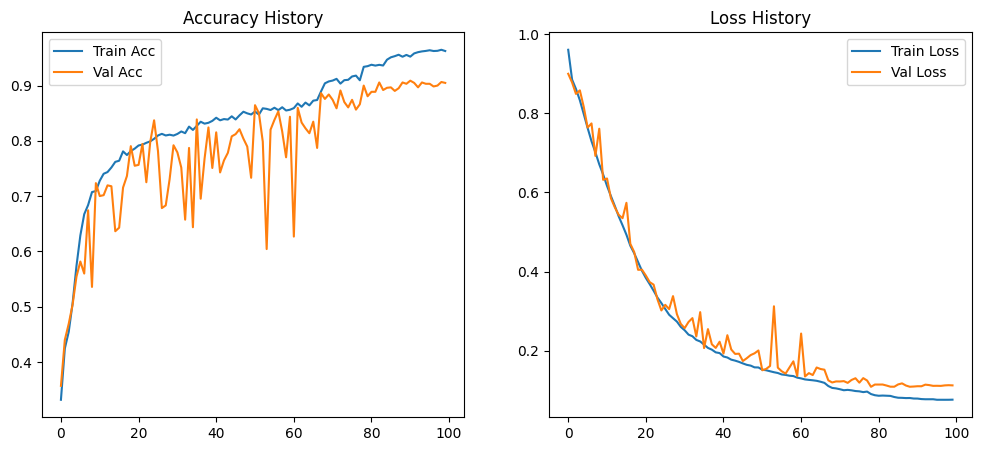

In [23]:
# ---------------------------
# 7. PLOT TRAINING
# ---------------------------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy History')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss History')
plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 26s 645ms/step
Classification Report:
                   precision    recall  f1-score   support

Asiatic-Mongoloid       0.95      0.94      0.94       301
  Kaukasoid-Indic       0.87      0.86      0.86       333
Malayan-Mongoloid       0.86      0.87      0.86       304
       Melanesoid       0.91      0.92      0.92       308

         accuracy                           0.89      1246
        macro avg       0.90      0.90      0.90      1246
     weighted avg       0.89      0.89      0.89      1246



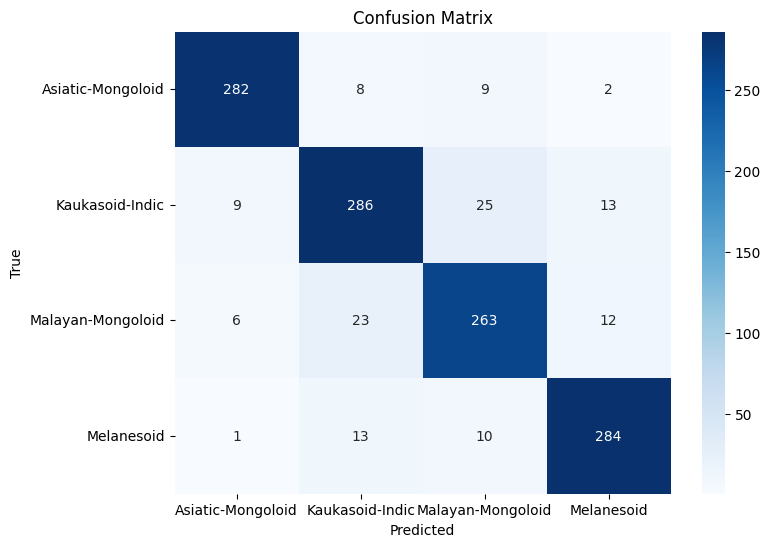

In [24]:
# ---------------------------
# 8. EVALUASI MODEL
# ---------------------------
y_true = test_generator.classes
y_prob = model.predict(test_generator)
y_pred = np.argmax(y_prob, axis=1)

labels = list(test_generator.class_indices.keys())

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

C:\Users\rayna\anaconda3\envs\tf-env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 25s 605ms/step
Classification Report:
                   precision    recall  f1-score   support

Asiatic-Mongoloid       0.93      0.95      0.94       301
  Kaukasoid-Indic       0.86      0.87      0.86       333
Malayan-Mongoloid       0.88      0.85      0.86       304
       Melanesoid       0.92      0.92      0.92       308

         accuracy                           0.90      1246
        macro avg       0.90      0.90      0.90      1246
     weighted avg       0.90      0.90      0.90      1246



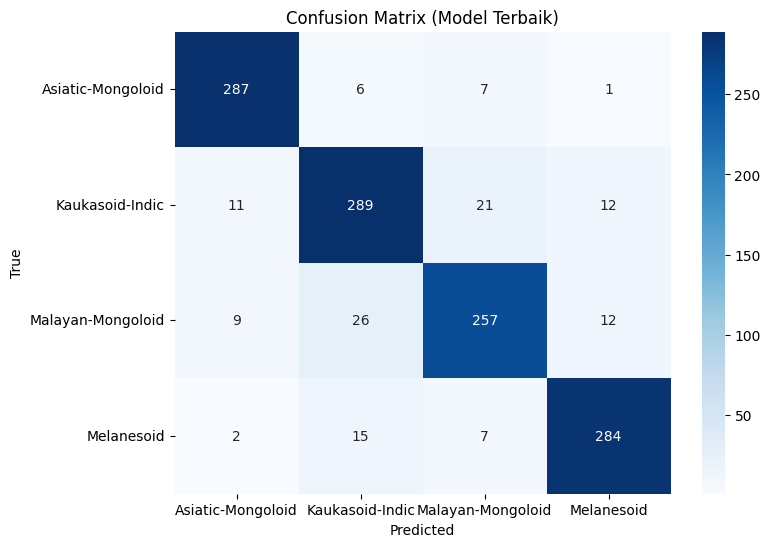

In [10]:
from tensorflow.keras.models import load_model

best_model = load_model(r"C:\Users\rayna\Downloads\Model Terbaik_Tahap 1_resnet34.h5", custom_objects={'focal_loss_fixed': focal_loss(gamma=2.0, alpha=0.25)})


# 2. Prediksi pakai model terbaik
y_true = test_generator.classes
y_prob = best_model.predict(test_generator)
y_pred = np.argmax(y_prob, axis=1)

# 3. Buat label
labels = list(test_generator.class_indices.keys())

# 4. Print Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))

# 5. Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Model Terbaik)")
plt.show()


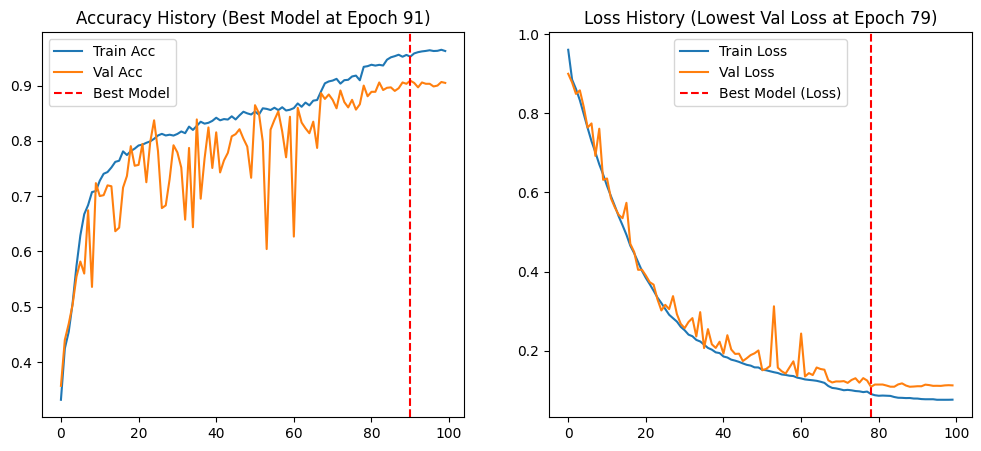

In [26]:
# ---------------------------
# 7. PLOT TRAINING (MODEL TERBAIK)
# ---------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.axvline(x=np.argmax(history.history['val_accuracy']), color='r', linestyle='--', label='Best Model')
plt.legend()
plt.title('Accuracy History (Best Model at Epoch {})'.format(np.argmax(history.history['val_accuracy']) + 1))

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.axvline(x=np.argmin(history.history['val_loss']), color='r', linestyle='--', label='Best Model (Loss)')
plt.legend()
plt.title('Loss History (Lowest Val Loss at Epoch {})'.format(np.argmin(history.history['val_loss']) + 1))

plt.show()
